In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [10]:
# Memanggil dataset
dataset = pd.read_csv('./populasi.csv')
X = dataset.iloc[:,:1]
Y = dataset.iloc[:,1].values
my_data = pd.DataFrame(dataset)

# Memanggil dataset yang akan diprediksi
data_test = pd.read_csv('./prediksipopulasi.csv')
test_X = data_test.iloc[:,:1]
Y

array([ 87.75,  90.1 ,  92.52,  95.02,  97.6 , 100.3 , 103.  , 105.9 ,
       108.8 , 111.8 , 114.8 , 117.9 , 121.  , 124.2 , 127.4 , 130.7 ,
       134.  , 137.3 , 140.6 , 144.  , 147.4 , 150.9 , 154.5 , 158.  ,
       161.5 , 165.  , 168.4 , 171.7 , 175.  , 178.2 , 181.4 , 184.6 ,
       187.7 , 190.9 , 193.9 , 196.9 , 199.9 , 202.8 , 205.7 , 208.6 ,
       211.5 , 214.4 , 217.4 , 220.3 , 223.3 , 226.3 , 229.3 , 232.4 ,
       235.5 , 238.6 , 241.8 , 245.1 , 248.5 , 251.8 , 255.1 , 258.4 ,
       261.6 , 264.7 , 267.7 , 270.6 , 273.5 ])

In [22]:
# Membagi data yang nantinya akan diujikan
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_test)
print(test_X)

    Tahun
26   1986
35   1995
60   2020
28   1988
11   1971
2    1962
34   1994
59   2019
40   2000
22   1982
4    1964
10   1970
30   1990
41   2001
33   1993
43   2003
49   2009
7    1967
14   1974
   tahun
0   2021
1   2022
2   2023
3   2024
4   2025
5   2026
6   2027
7   2028
8   2029
9   2030


In [23]:
# Fitting pada data training
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Memprediksi hasil dengan data test
Y_pred = regressor.predict(test_X)
Y_pred = np.round(Y_pred, 3)
print(Y_pred)

[277.278 280.431 283.584 286.738 289.891 293.044 296.198 299.351 302.504
 305.657]


In [24]:
# Menyimpan hasil ke file CSV
test_years = np.array(test_X)
year = pd.DataFrame(test_years)
prediction = pd.DataFrame(Y_pred)
result = pd.concat([year, prediction], axis=1)
np.savetxt('result.csv', result, delimiter=',')
result

,0,0
0,2021,277.278
1,2022,280.431
2,2023,283.584
3,2024,286.738
4,2025,289.891
5,2026,293.044
6,2027,296.198
7,2028,299.351
8,2029,302.504
9,2030,305.657


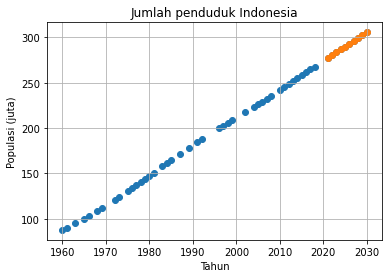

In [28]:
# Membuat visualisasi data penduduk Indonesia dari tahun ke tahun
# Menggabungkan data training dan hasil prediksi
absis = (np.concatenate([X_train, test_X]))
ordinat = (np.concatenate([Y_train, Y_pred]))

# Membuat plot total
plt.scatter(absis, ordinat)

# Membuat plot proyeksi
plt.scatter(year, prediction)

plt.xlabel("Tahun")
plt.ylabel("Populasi (juta)")
plt.title("Jumlah penduduk Indonesia")
plt.grid()
plt.show()